# Homework 7: Regexes and Structured Data (27 points)

name: Yiyang Zhang

email: zhyiyang@umich.edu

This homework assignment took me 15 hours in total to complete. (Please help us to gauge the difficulty of the assignment.)

## Collaboration Disclosure

In the cell below, please list *everyone* with whom you discussed any of the homework problems, excluding only the GSIs and the course instructor. 

If you did not discuss the homework with anyone else, write __"I did not discuss this homework with anyone."__

Even if you discuss questions with other, the code you submit must be only yours. All work is checked with the [MOSS plagiarism detector](https://theory.stanford.edu/~aiken/moss/).

I discussed this homework with Shuxin Yu and Tianhao Gu.

## Submission Instructions
Your homework solutions should be written entirely in this Jupyter notebook file. Once it contains your solutions, you should submit this notebook through Canvas. Before submitting, please make sure make sure __Cells->Run__ executes without errors; errors in your code cause problems for our auto-grader. Thus, even though we may ask you to check for errors in your functions, you should not include in your submission any examples of your functions actually raising those errors.

## Nbgrader

We will be using `nbgrader` to grade your jupyter notebook. Additional tests will be used at grading time, you are encouraged to read the problem carefully and verify your code covers all appropriate cases.

**Be careful:** If a jupyter notebook cell takes longer than `60s` to run, the autograder will not grade it and you will receive zero credit for that question.

## Error checking

You do not need to do error checking (raising errors, etc.) in your code unless we explicitly ask you to so in a problem.

## Coding style
Please follow the [PEP8 guidelines](https://www.python.org/dev/peps/pep-0008/). The `pycodestyle_magic` package will remind you if you are not. To install it, run
```
pip install flake8 pycodestyle_magic
```
Once it is installed the following two Jupyter directives will enable syntax checking:

In [1]:
%load_ext pycodestyle_magic
%flake8_on --ignore E266 --max_line_length=99

## 1 Regular Expressions: Warmup (10 points)

In this problem, you'll get practice with basic regular expressions. Pay particular attention to edge cases such as the empty string and single-character strings when writing your regexes. At the URL http://www.greenteapress.com/thinkpython/code/words.txt is a list of about 100,000 English words.

**Note:** For this problem, you can assume all characters/words are lower-case. 

### Part 1 (1 point) 
Use the `urllib` python module to open the URL and read the file, and produce a list named `ascii_list` of ASCII strings so that each line of the file corresponds to an element of the list. 

In [2]:
import urllib.request
import re

# YOUR CODE HERE
# Begin answer
with urllib.request.urlopen("http://www.greenteapress.com/thinkpython/code/words.txt") as response:
    txt = response.read()
ascii_list = txt.splitlines()
# End answer

In [3]:
assert type(ascii_list) == list, "Variable ascii_list does not \
                                  exist or not a list."
assert isinstance(ascii_list[0], bytes)
assert ascii_list[0] == b'aa'
assert len(ascii_list) == 113809

### Part 2 (1 point) 
Each element of the `ascii_list` you produced in the previous problem is a byte string.
Convert each element of `ascii_list` to a regular string and store the output as `word_list`.

In [4]:
# YOUR CODE HERE
# Begin answer
word_list = txt.decode("utf-8").splitlines()
# End answer

In [5]:
assert len(ascii_list) == len(word_list)
assert word_list[0] == 'aa'
assert isinstance(word_list[5], str)

### Part 3 (2 points)
Write a regular expression that matches any string containing exactly three consecutive vowels. Compile this regular expression, and assign it to a variable called `three_consecutive_vowels`. The compiled regular expression should match and return the whole word.

Use this regex to determine the words in `word_list` which contain exactly three consecutive vowels. For the purposes of this **specific** subproblem, the vowels are "a, e, i, o, u". All other letters are consonants. Produce a list `q1_3` of all such words.

In [6]:
# Write your code to create the regex and the list here.
# YOUR CODE HERE
# Begin answer
three_consecutive_vowels = re.compile(r"[aeiou]{3}")
q1_3 = list(filter(three_consecutive_vowels.search, word_list))
# End answer

In [7]:
assert q1_3[0] == 'aboideau'
assert q1_3[-1] == 'zouaves'

In [8]:
assert three_consecutive_vowels.match("aei").group(0) == "aei"

### Part 4  (2 point) 
Write a regular expression that matches any lowercase alphanumeric string  which does not contain the letter 'e'. Compile this regular expression, and assign it to a variable called `gadsby`. ("Gadsby" is the title of an English novel written in the 1930s that contains __almost__ no instances of the letter "e"). 

How many words in `word_list` do not contain the letter "e"? Enter your answer as a variable called `num_words_no_e`.

**Note:** A lowercase alphanumeric string consists of only lower-case letters and digits. You can assume this is the only input your regular expression will receive.

In [9]:
# Create your variable 'gadsby' here.
# YOUR CODE HERE
# Begin answer
gadsby = re.compile(r'[^e]+$')
num_words_no_e = len(list(filter(gadsby.match, word_list)))
# End answer

In [10]:
assert gadsby.match("stats").group(0) == 'stats'
assert gadsby.match("state") is None

In [11]:
assert type(num_words_no_e) == int
assert num_words_no_e > 0

### Part 5 (2 points)

Write a regular expression that matches any string that begins and ends with a consonant and has no consonants in between. 
For the purposes of this __specific__ subproblem, "y" is neither a consonant nor vowel, so consonants are the 20 letters that are not one of "a, e, i, o, u, y" and vowels are "a, e, i, o, u". 

The words need not begin and end with the _same_ consonant, so 'door' is a valid match. Compile this regular expression, and assign it to a variable called `consonant_consonant`. 

How many words in `word_list` begin and end with a consonant with no consonants in between? Assign this answer to a variable `num_words_consonants`

In [12]:
# create your variables 'consonant_consonant' and `num_words_consonants` here.
# YOUR CODE HERE
# Begin answer
consonant_consonant = re.compile(r"[bcdfghjklmnpqrstvwxz]{1}[^bcdfghjkl\
                                 mnpqrstvwxz]*[bcdfghjklmnpqrstvwxz]$")
num_words_consonants = len(list(filter(consonant_consonant.search, word_list)))
# End answer

In [13]:
assert consonant_consonant.match("door").group(0) == 'door'
assert consonant_consonant.match("bb").group(0) == "bb"
assert consonant_consonant.match("aaabaaa") is None
assert consonant_consonant.match("stats") is None
assert consonant_consonant.match("by") is None

In [14]:
assert type(num_words_consonants) == int
assert num_words_consonants > 0

### Part 6  (2 points)
Write a regular expression that matches any string whose last two characters are the first two characters in reverse order. So, for example, your regex should match "repeater" and "stats", but not "neoprene". Compile this regular expression and assign it to a variable called `bookends`. 

How many words in `word_list` have this property? Assign this number to a variable `num_words_bookends`

__Note:__ Your regex should NOT match cases where the word has a length of 3 or less. 

In [15]:
# YOUR CODE HERE
# Begin answer
bookends = re.compile(r'^(\w)(\w).*\2\1$')
num_words_bookends = len(list(filter(bookends.search, word_list)))
# End answer

In [16]:
assert bookends.match("repeater").group(0) == 'repeater'
assert bookends.match("stats").group(0) == 'stats'
assert bookends.match("fallinaf").group(0) == 'fallinaf'

assert bookends.match("neoprene") is None
assert bookends.match("afa") is None

In [17]:
assert num_words_bookends > 0
assert type(num_words_bookends) == int

## 2 Exploring Internet Traffic with Regexes (6 points)

In this problem, you'll get a taste of a more realistic application of regular expressions. The file `SkypeIRC.txt` (which was included along with this homework in `hw7.zip`) contains data generated by web traffic associated with Skype and IRC, captured using the Wireshark program, a common tool for analyzing web traffic. 

### Part 1 (1 point) 

Open the file `SkypeIRC.txt` and read its contents into a string. Each line of this file corresponds to a single packet sent over the internet. Save a list containing each packet into a variable called `packets`.

How many packets are in this file? Save the answer in a variable `n_packets`. 

In [18]:
# YOUR CODE HERE
# Begin answer
with open("SkypeIRC.txt", "rb") as file:
    SkypeIRC = file.read()
packets = SkypeIRC.decode("utf-8").splitlines()
packets = [i.strip() for i in packets]
n_packets = len(packets)
# End answer

In [19]:
assert type(n_packets) == int
assert type(packets) == list

### Part 2 (2 points)

An IP address consists of four numbers, which are displayed as `A.B.C.D` where `A,B,C`, and `D` are each numbers between 0 and 255 inclusive.

Use regular expressions to extract all the IP addresses from the file and collect them in a Python list. How many unique IP addresses appear in the data set? Save the answer in a variable `n_ip_addresses`. 

__Note:__ there are a few pieces of text in the file that _look_ like IP addresses but aren't (e.g., they are of the form `A.B.C.D`, but one or more of `A,B,C`, and `D` are outside the range 0 to 255). You should try to craft a regex that matches as few of these as you can, but of course it will not be possible to avoid certain edge cases.

In [20]:
# YOUR CODE HERE
# Begin answer
SkypeIRC = open('SkypeIRC.txt', encoding="utf-8")
SkypeIRC_content = SkypeIRC.read()
regex_ip = re.compile(r'((25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9][0-9]|[0\
                      -9])\.(25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9][0-9]|[0\
                      -9])\.(25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9][0-9]|[0\
                      -9])\.(25[0-5]|2[0-4][0-9]|1[0-9][0-9]|[1-9][0-9]|[0-9]))')
ip_addresseses = [t[0] for t in regex_ip.findall(SkypeIRC_content)]
n_ip_addresses = len(set(ip_addresseses))
# End answer

In [21]:
assert type(n_ip_addresses) == int

### Part 3 (1 points) 

Write a function called `get_packets_by_regex` that takes a single raw string as its argument and returns a list of all the lines from the input file `SkypeIRC.txt` that match the input raw string as a regular expression. 

So, for example, `get_packets_by_regex(r"comcast")` will return all lines from the file containing the string `"comcast"`. You can assume that your input is a raw string.

In [22]:
def get_packets_by_regex(s):
    # YOUR CODE HERE
    # Begin answer
    if not isinstance(s, str):
        raise TypeError('Input should be a raw string')
    regex = re.compile(s)
    file_list = SkypeIRC_content.split('\n')
    return [line for line in file_list if regex.search(line) is not None]
    # End answer

In [23]:
assert type(get_packets_by_regex(r'114.214.204.212')) == list
assert len(get_packets_by_regex(r'114.214.204.212')) == 2

### Part 4 (2 points) 
The second piece of text (i.e., non-whitespace) on each line is a time stamp, counting the time (in seconds) since the beginning of the traffic recording. Using `matplotlib`, create a plot displaying how many packets appeared in each second of the recording. Be sure to label your plot with appropriate axes labels. 

A histogram or line plot is the most obvious way to do this, but you should feel free to use a more creative way of displaying this information if you wish to do so. The plot should display in your ipython notebook after running the cell below. 

__Note:__ There is no need to use a regular expression for this subproblem if you do not want to.

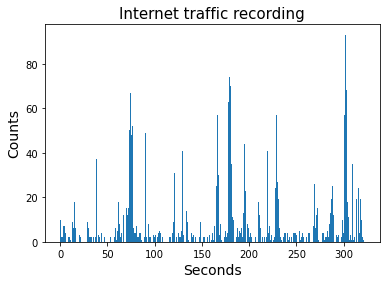

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt

# YOUR CODE HERE
# Begin answer
regex_time = re.compile(r'\s\d+\.\d+\s')
time_data = [float(num) for num in regex_time.findall(SkypeIRC_content)]
time_range = int(time_data[-1])+1
plt.hist(time_data,bins = range(time_range))
plt.xlabel("Seconds",fontsize = 14)
plt.ylabel("Counts",fontsize = 14)
plt.title('Internet traffic recording',fontsize = 15)
_ = plt.show()
# End answer

## 3 Retrieving Data from the Web (3 points)
In this problem, we'll scrape data from Wikipedia using __BeautifulSoup__. Documentation for BeauitfulSoup can be found at https://www.crummy.com/software/BeautifulSoup/bs4/doc/. As mentioned in lecture, there is another package, called __requests__, which is becoming quite popular, which you are welcome to use for this problem instead, if you wish. Documentation for the `requests` package can be found at http://docs.python-requests.org/en/master/.

### Part 1 (2 points) 

Look at a few Wikipedia pages corresponding to cities. For example:
 - https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan
 - https://en.wikipedia.org/wiki/Buenos_Aires
 - https://en.wikipedia.org/wiki/Harbin
 
Each place in Wikipedia has a GPS location located at the top which links to a page on Geohack.

![](./wiki_geohacks.png)

Write a function called `get_geohack_wiki` which takes a Wikipedia link as input and returns a string of the url pointing to the Geohack page.

In [25]:
import urllib.request
import re
from bs4 import BeautifulSoup


def get_geohack_wiki(url):
    # YOUR CODE HERE
    # Begin answer
    response = urllib.request.urlopen(url)
    html_doc = response.read()
    parsed = BeautifulSoup(html_doc, 'html.parser')
    link2 = []
    for link0 in parsed.find_all("span"):
        for link1 in link0.find_all("a"):
            link2.append(link1.get("href"))
    for i in link2:
        if i.split(".")[0] == "//geohack":
            return "".join(["https:", i])
            break
    else:
        raise ValueError
    # End answer

In [26]:
assert get_geohack_wiki(
    'https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan'
) == 'https://geohack.toolforge.org/geohack.php?pagename=Ann_Arbor,_Michigan&params=42_16_53_N_83_44_54_W_region:US-MI_type:city(113934)'  # noqa:  E501
assert get_geohack_wiki(
    'https://en.wikipedia.org/wiki/Buenos_Aires'
) == 'https://geohack.toolforge.org/geohack.php?pagename=Buenos_Aires&params=34_36_12_S_58_22_54_W_region:AR_type:city'  # noqa: E501
assert get_geohack_wiki(
    'https://en.wikipedia.org/wiki/Harbin'
) == 'https://geohack.toolforge.org/geohack.php?pagename=Harbin&params=45.7576_N_126.6409_E_type:adm2nd_region:CN-23_source:Gaode'  # noqa: E501
assert get_geohack_wiki(
    'https://en.wikipedia.org/wiki/Monte_Carlo'
) == 'https://geohack.toolforge.org/geohack.php?pagename=Monte_Carlo&params=43_44_23_N_7_25_38_E_region:MC_type:city'  # noqa: E501
try:
    get_geohack_wiki('https://en.wikipedia.org/wiki/Google')
    assert False
except ValueError:
    assert True
except:  # noqa: E722
    assert False

In [27]:
# pylint: disable=E501
assert get_geohack_wiki(
    'https://en.wikipedia.org/wiki/University_of_Michigan'
) == 'https://geohack.toolforge.org/geohack.php?pagename=University_of_Michigan&params=42_16_37_N_83_44_17_W_'  # noqa: E501
assert get_geohack_wiki(
    'https://en.wikipedia.org/wiki/Michigan_State_University'
) == 'https://geohack.toolforge.org/geohack.php?pagename=Michigan_State_University&params=42_43_30_N_84_28_48_W_region:US_type:edu'  # noqa: E501

### Part 2 (1 point) 

Now, we want to extract just the Decimal GPS Coordiates on the Geohack website:

![](./geohack_decimal.png)

Write a function called `get_gps_wiki` which takes **a Wikipedia link** as input and returns a tuple of the Decimal GPS coordinates from the associated Geohack Website.

#### Hints
- Use the```get_geohack_wiki``` function from Part 1.
- It will most likely be easiest to find and parse the "Geo URI".

In [28]:
def get_gps_wiki(wiki_url):
    url = get_geohack_wiki(wiki_url)
    # YOUR CODE HERE
    # Begin answer
    response = urllib.request.urlopen(url)
    soup1 = BeautifulSoup(response, "html.parser")
    if soup1.find("span", class_="latitude p-latitude") is not None:
        lat = soup1.find("span", class_="latitude p-latitude")
        lat_lst = lat.find_all_next(string=True)
        lat_num = float(lat_lst[0])
        long = soup1.find("span", class_="longitude p-longitude")
        long_lst = long.find_all_next(string=True)
        long_num = float(long_lst[0])
        ret = (lat_num, long_num)
        return ret
    else:
        raise ValueError
# End answer

In [29]:
assert get_gps_wiki(
    'https://en.wikipedia.org/wiki/Ann_Arbor,_Michigan'
) == (42.281389, -83.748333)
assert get_gps_wiki(
    'https://en.wikipedia.org/wiki/Monte_Carlo'
) == (43.739722, 7.427222)
assert get_gps_wiki(
    'https://en.wikipedia.org/wiki/Johannesburg'
) == (-26.204444, 28.045556)
try:
    get_gps_wiki('https://en.wikipedia.org/wiki/Google')
    assert False
except ValueError:
    assert True
except:  # noqa: E722
    assert False

## 4 Relational Databases and SQL (8 points)
In this problem, you'll interact with a toy SQL database using Python's built-in `sqlite3` package. Documentation can be found at https://docs.python.org/3/library/sqlite3.html. For this problem, we'll use a popular toy SQLite database, called `Chinook`, which represents a digital music collection. See the documentation at:
 
 https://github.com/lerocha/chinook-database/blob/master/ChinookDatabase/DataSources/Chinook_Sqlite.sqlite

for a more detailed explanation. We'll use the `.sqlite` file `Chinook_Sqlite.sqlite`, which should have been included along with this hwk in the `hw7.zip` file. 

### Part 1 (1 points) 
Load the database using the Python `sqlite3` package. How many tables are in the database? Save the answer in the variable `n_tables`.

In [30]:
import sqlite3
# YOUR CODE HERE
conn = sqlite3.connect('Chinook_Sqlite.sqlite')
c = conn.cursor()
n = c.execute("SELECT count(name) AS n_tables FROM sqlite_master WHERE type='table';").fetchall()
n_tables = n[0][0]

In [31]:
assert type(n_tables) == int
assert n_tables > 2

### Part 2 (1 points) 
What are the names of the tables in the database? Save the answer as a list of strings, `table_names`. 

__Note:__ you should write Python `sqlite3` code to answer this; don't just look up the answer in the documentation!

In [32]:
table_names = []
# YOUR CODE HERE
table = c.execute("SELECT name FROM sqlite_master WHERE type='table';").fetchall()
table_names = [i[0] for i in table]

In [33]:
assert type(table_names) == list
assert len(table_names) > 2
assert 'Album' in table_names and 'Employee' in table_names

### Part 3 (2 points)

Write a function `list_album_ids_by_letter` that takes as an argument a single character and returns a list of the primary keys of all the albums whose titles start with that character. Your function should ignore case, so that the inputs "a" and "A" yield the same results. 

Include error checking that raises an error in the event that the input is not a single character.

**Note:** If no album starts with the given letter, the output should be an empty list.

In [34]:
def list_album_ids_by_letter(s):
    # YOUR CODE HERE
    if not isinstance(s, str):
        raise TypeError("input not character")
    elif len(s) != 1:
        raise ValueError("input is not single character")
    # ignore cases
    query_parameter = ("{}%".format(s.lower()), "{}%".format(s.upper()))
    sql = '''SELECT AlbumID FROM Album WHERE Title LIKE ? OR Title LIKE ?'''
    album = c.execute(sql, query_parameter).fetchall()
    album_key = [i[0] for i in album]
    return album_key

In [35]:
try:
    list_album_ids_by_letter('ndf')
    assert False
except ValueError:
    assert True

In [36]:
assert list_album_ids_by_letter('n') == [28, 105, 164, 173, 186, 189, 217, 338]

### Part 4 (2 points)
Write a function `list_song_ids_by_album_letter` that takes as an argument a single character and returns a list of the primary keys of all the songs whose album names begin with that letter. 

Again, your function should ignore case and perform error checking as in `list_album_ids_by_letter`. Just like before, your function should return an empty list if there are no matches.

__Hint:__ you'll need a `JOIN` statement here. Don't forget that you can use the `cursor.description` attribute to find out about tables and the names of their columns.

In [37]:
def list_song_ids_by_album_letter(s):
    # YOUR CODE HERE
    if not isinstance(s, str):
        raise TypeError("input not character")
    elif len(s) != 1:
        raise ValueError("input is not single character")
    # ignore cases
    query_parameter = ("{}%".format(s.lower()), "{}%".format(s.upper()))
    sql = '''SELECT Track.TrackID
    FROM Track LEFT JOIN Album ON Album.AlbumID = Track.AlbumID
    WHERE Album.Title LIKE ? OR Album.title LIKE ?'''
    song = c.execute(sql, query_parameter).fetchall()
    song_key = [i[0] for i in song]
    return song_key

In [38]:
try:
    list_song_ids_by_album_letter('ndf')
    assert False
except ValueError:
    assert True

In [39]:
assert list_song_ids_by_album_letter('z') == [3028, 3029, 3030, 3031,
                                              3032, 3033, 3034, 3035,
                                              3036, 3037]

### Part 5 (2 points)

Write a function `total_cost_by_album_letter` that takes as an argument a single character and returns the cost of buying every song whose album begins with that letter. This cost should be based on the tracks' unit prices, so that the cost of buying a set of tracks is simply the sum of the unit prices of all the tracks in the set. Assume input is always a single lower case chracter.

In [40]:
def total_cost_by_album_letter(s):
    # YOUR CODE HERE
    if not isinstance(s, str):
        raise TypeError("input not character")
    elif len(s) != 1:
        raise ValueError("input is not single character")
    # ignore cases
    query_parameter = ("{}%".format(s.lower()), "{}%".format(s.upper()))
    sql = '''SELECT sum(Track.UnitPrice)
    FROM Track LEFT JOIN Album ON Track.AlbumID = Album.AlbumID
    WHERE Album.Title LIKE ? OR Album.Title LIKE ?'''
    cost = c.execute(sql, query_parameter).fetchall()
    cost_list = [i[0] for i in cost]
    return cost_list[0]

In [41]:
assert total_cost_by_album_letter('z') == 9.9

In [42]:
assert round(total_cost_by_album_letter('a'), 0) == 366